<h2 style="color:blue" align="center">Handwritten digits classification using ANN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

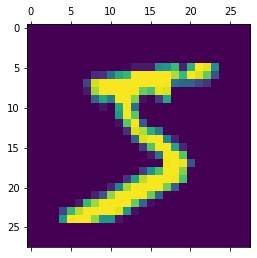

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

# <h3 style='color:purple'>Using ANN for classification</h3>

In [11]:
model = model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2769 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1261 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0881 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0662 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9835


In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0744 - accuracy: 0.9768


[0.07443150877952576, 0.9768000245094299]

## Save and Load Model

# Ways we can save and load our machine learning model are as follows:

1. Using the inbuilt function model.save()

2. Using the inbuilt function model.save_weights()

# **Using save() method**

Now we can save our model just by calling the save() method and passing in the filepath as the argument. This will save the model’s

Model Architecture

Model Weights

Model optimizer state (To resume from where we left off)

Syntax: tensorflow.keras.X.save(location/model_name)

Here X refers to Sequential, Functional Model, or Model subclass. All of them have the save() method.

The location along with the model name is passed as a parameter in this method.

If only the model name is passed then the model is saved in the same location as that of the Python file.

We can load the model which was saved using the load_method() present in the tensorflow module.

Syntax: tensorflow.keras.models.load_model(location/model_name)

The location along with the model name is passed as a parameter in this method.

NOTE: If we specify “.h5”, the model will be saved in hdf5 format; if no extension is specified, the model will be saved in TensorFlow native format.

In [ ]:
model.save("my_Func_model.h5")
print('Model Saved!')

# Using save_weights() method

Now you can simply save the weights of all the layers using the save_weights() method. It saves the weights of the layers contained in the model.

It is advised to use the save() method to save h5 models instead of save_weights() method for saving a model using tensorflow. However, h5 models can also be saved using save_weights() method.

Syntax: tensorflow.keras.Model.save_weights(location/weights_name)

The location along with the weights name is passed as a parameter in this method. If only the weights name is passed then it is saved in the same location as that of the Python file.

In [16]:
model.save("my_Func_model.h5")
print('Model Saved!')

Model Saved!


In [18]:
# load model
from tensorflow.keras.models import load_model
savedModel=load_model('my_Func_model.h5')
savedModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
# saving and loading the model weights
 
# save model
model.save_weights('gfgModelWeights')
print('Model Saved!')

Model Saved!


In [20]:
# load model
savedModel = model.load_weights('gfgModelWeights')
print('Model Loaded!')

Model Loaded!


In [21]:
# saving and loading the .h5 model
 
# save model
model.save_weights('gfgModelWeights.h5')
print('Model Saved!')

Model Saved!


In [22]:
# load model
savedModel = model.load_weights('gfgModelWeights.h5')
print('Model Loaded!')

Model Loaded!
